# 1. Importing Libraries

Including the libraries that will be utilized in this notebook.

In [32]:
import numpy as np
import pandas as pd 
import datetime 

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet


#Avoid Future Warnings and Random variables
import random
random.seed(54)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')

#  2. Information About Data 

In [33]:
df=pd.read_csv('nyc-rolling-sales.csv')

**Head of data**

In [34]:
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [35]:
df=df.drop(['Unnamed: 0'],axis=1)

**Data Types**

In [36]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

**Data Information**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

**Assign Dtypes**

In [38]:
#Let's convert some of the columns to appropriate datatype
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

**Checking Null Values**

In [39]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Filling null values 

In [40]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(0)
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(0)
df['SALE PRICE']=df['SALE PRICE'].fillna(0)

**Checking Duplicated Values**

In [41]:
df.duplicated().sum()

765

There are 765 duplicated values in data. We need to remove them.

In [42]:
df = df.drop_duplicates()

**Statistical Result**

In [43]:
df.select_dtypes(include=np.number).describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,8.378300e+04
mean,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,2.655853e+03,2.621502e+03,1789.814318,1.064009e+06
std,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,3.453360e+04,2.864058e+04,536.565051,1.042963e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,0.000000e+00
50%,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1.759000e+03,1.068000e+03,1940.000000,4.200000e+05
75%,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,1965.000000,8.350000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


# 3.Feature Engineering

👉 Within this segment, our focus will be on deriving novel attributes from the current ones. The process of feature extraction is instrumental in identifying underlying data patterns. Date time and seasonal features help to understand the data clearly.

## 3.1 Date Time Features

In [44]:


def date_time_features(df):

  
    df['day'] =df['SALE DATE'].dt.day
    df['month'] = pd.to_datetime(df['SALE DATE'], errors='coerce').dt.month
    df['year'] = pd.to_datetime(df['SALE DATE'], errors='coerce').dt.year
    df['weekday'] =pd.to_datetime(df['SALE DATE'], errors='coerce').dt.weekday 
    
    return df



## 3.2 Seasonal Features

In [45]:
def is_spring(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 3) & (date.month <= 5)

def is_summer(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 6) & (date.month <= 8)

def is_autumn(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 9) & (date.month <= 11)

def is_winter(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 12) | (date.month <= 2)

def is_weekend(ds):
    date = pd.to_datetime(ds)
    return date.day_name in ('Saturday', 'Sunday')

def add_season(df):
    df = df.copy()
#     df.reset_index(inplace=True)
    df['is_spring'] = df['SALE DATE'].apply(is_spring)
    df['is_summer'] = df['SALE DATE'].apply(is_summer)
    df['is_autumn'] = df['SALE DATE'].apply(is_autumn)
    df['is_winter'] = df['SALE DATE'].apply(is_winter)
    df['is_weekend'] = df['SALE DATE'].apply(is_weekend)
    df['is_weekday'] = ~df['SALE DATE'].apply(is_weekend)
    return df

In [46]:
def newFeatures(df):
    df=date_time_features(df)
    df=add_season(df)
    return df

df=newFeatures(df)

# 4. Data Exploration 🔍

Within this segment, we aim to explore the data and visually uncover potential patterns or insights. Prior to commencing the visualization, we will segregate the categorical and numerical data to enhance efficiency in our analysis.

We'll initiate the process with categorical data, followed by numeric data. 

## 4.1 Categorical Variable 📊

### 4.1.1 Distribution of Neighborhood

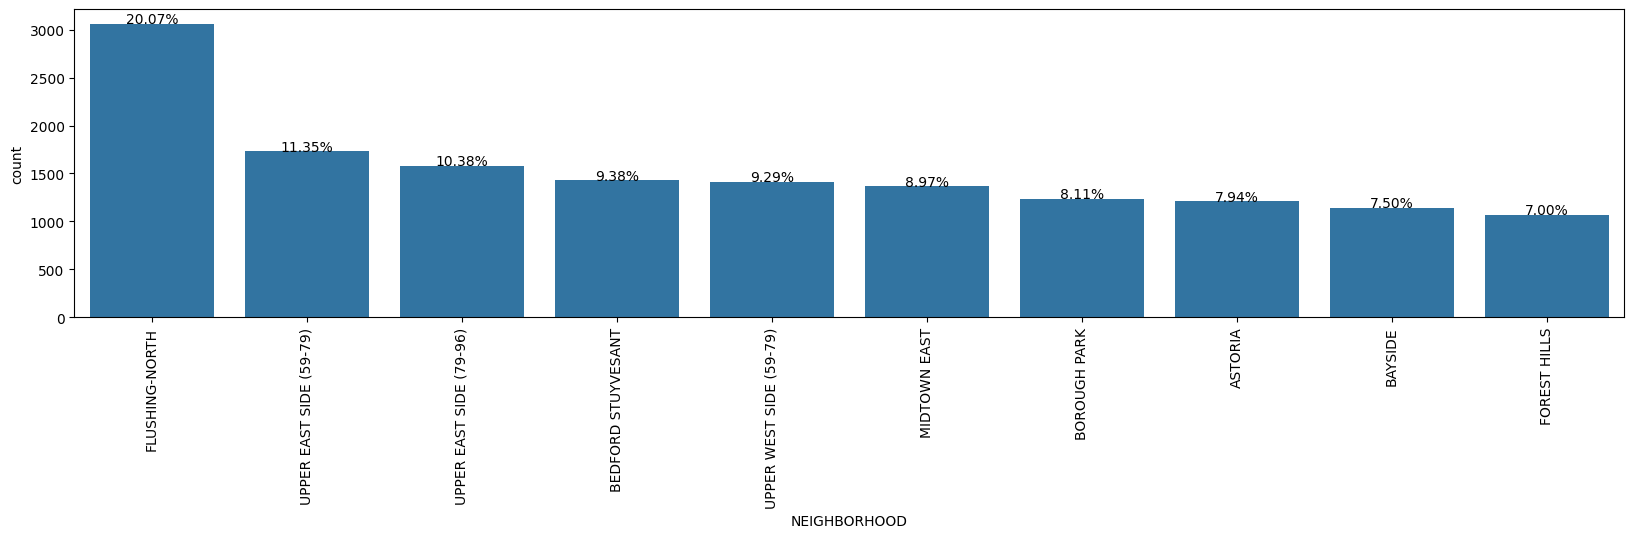

There are 212 unique neighborhoods.


In [47]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['NEIGHBORHOOD'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['NEIGHBORHOOD'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="NEIGHBORHOOD", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['NEIGHBORHOOD'].value_counts().unique()), 'unique neighborhoods.')



In above graph, we can see clearly that Flushing-North has the highest rate compared other neighbours

### 4.1.2 BUILDING CLASS CATEGORY

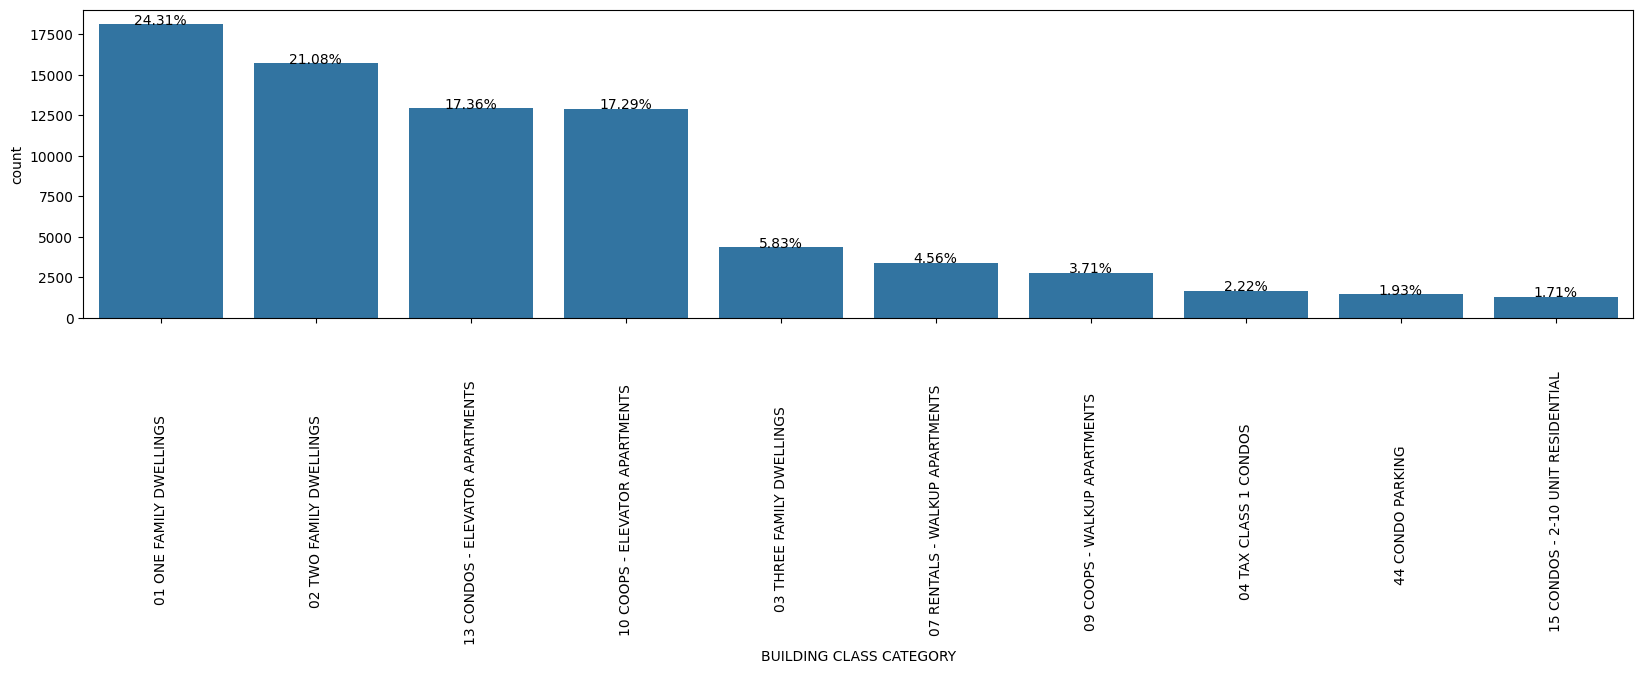

There are 43 unique building class categories.


In [48]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['BUILDING CLASS CATEGORY'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['BUILDING CLASS CATEGORY'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="BUILDING CLASS CATEGORY", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['BUILDING CLASS CATEGORY'].value_counts().unique()), 'unique building class categories.')




In the graph above, it is evident that single-family dwellings exhibit the highest frequency compared to other neighborhoods.

## 4.1.3 Tax Class

In [49]:
df['TAX CLASS AT PRESENT'].value_counts().unique

<bound method Series.unique of TAX CLASS AT PRESENT
1     38329
2     30721
4      5960
2A     2492
2C     1907
1A     1440
1B     1208
2B      799
        738
1C      186
3         3
Name: count, dtype: int64>

There are 738 blank space in tax class at present. We need to fill this blank with zero values.

In [50]:
df['TAX CLASS AT PRESENT'].replace(' ', pd.NA, inplace=True)

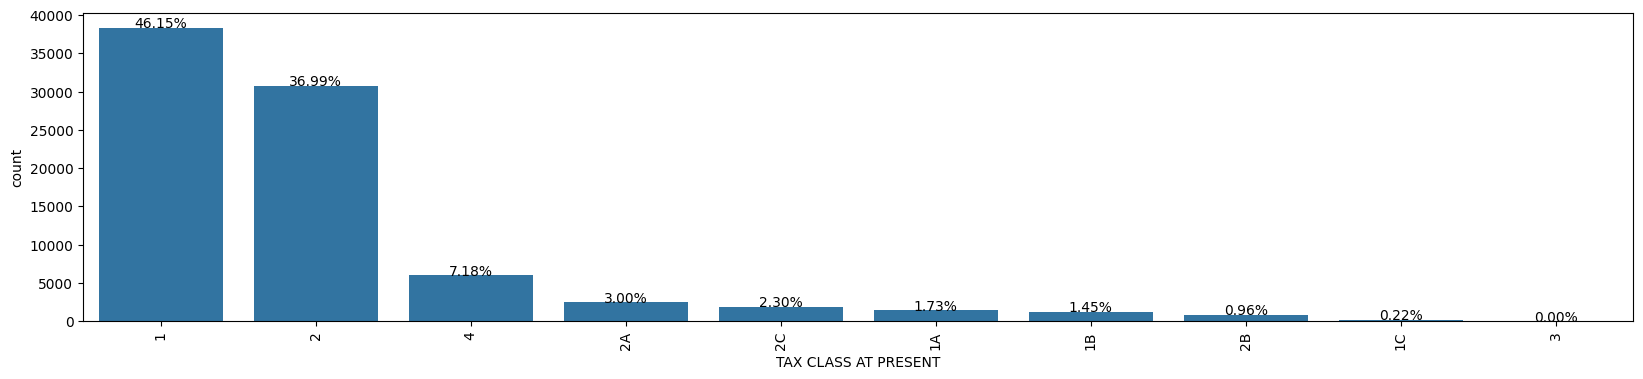

There are 10 unique tax class.


In [51]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['TAX CLASS AT PRESENT'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['TAX CLASS AT PRESENT'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="TAX CLASS AT PRESENT", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['TAX CLASS AT PRESENT'].value_counts().unique()), 'unique tax class.')



The type of tax-1 has the highest rate.

## 4.1.4 EASE-MENT

In [52]:
df['EASE-MENT'].value_counts().unique


<bound method Series.unique of EASE-MENT
    83783
Name: count, dtype: int64>


We observe that the 'ease-ment' feature exclusively consists of empty spaces. We will exclude this feature from the dataset.

In [53]:
df=df.drop('EASE-MENT',axis=1)

## 4.1.5 BUILDING CLASS AT PRESENT

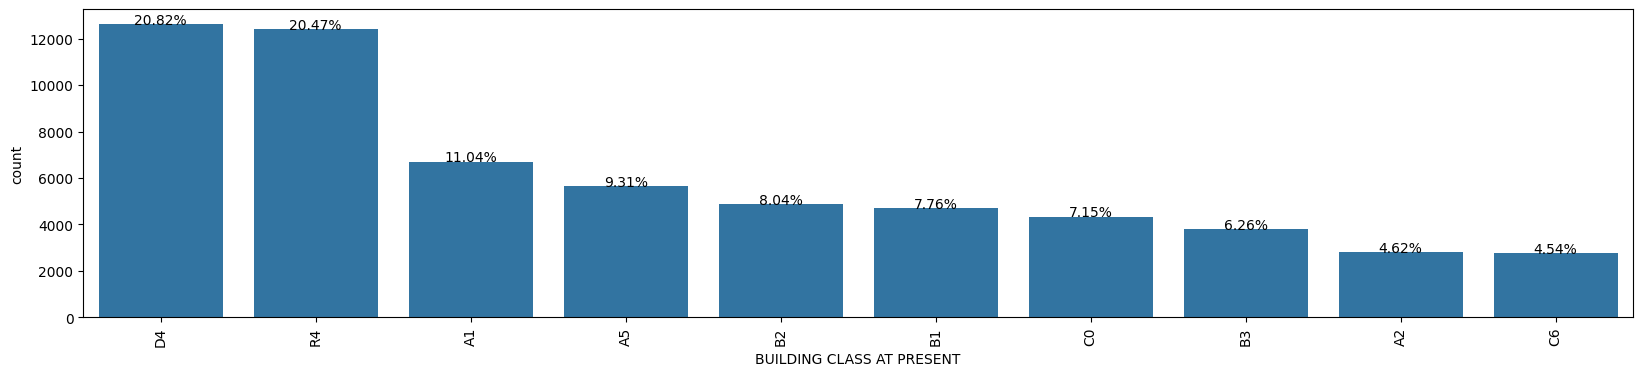

There are 90 unique building class at present categories.


In [54]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['BUILDING CLASS AT PRESENT'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['BUILDING CLASS AT PRESENT'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="BUILDING CLASS AT PRESENT", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['BUILDING CLASS AT PRESENT'].value_counts().unique()), 'unique building class at present categories.')



D4 and R4 have the highest rate of the builfing class at present.

## 4.1.6 ADDRESS

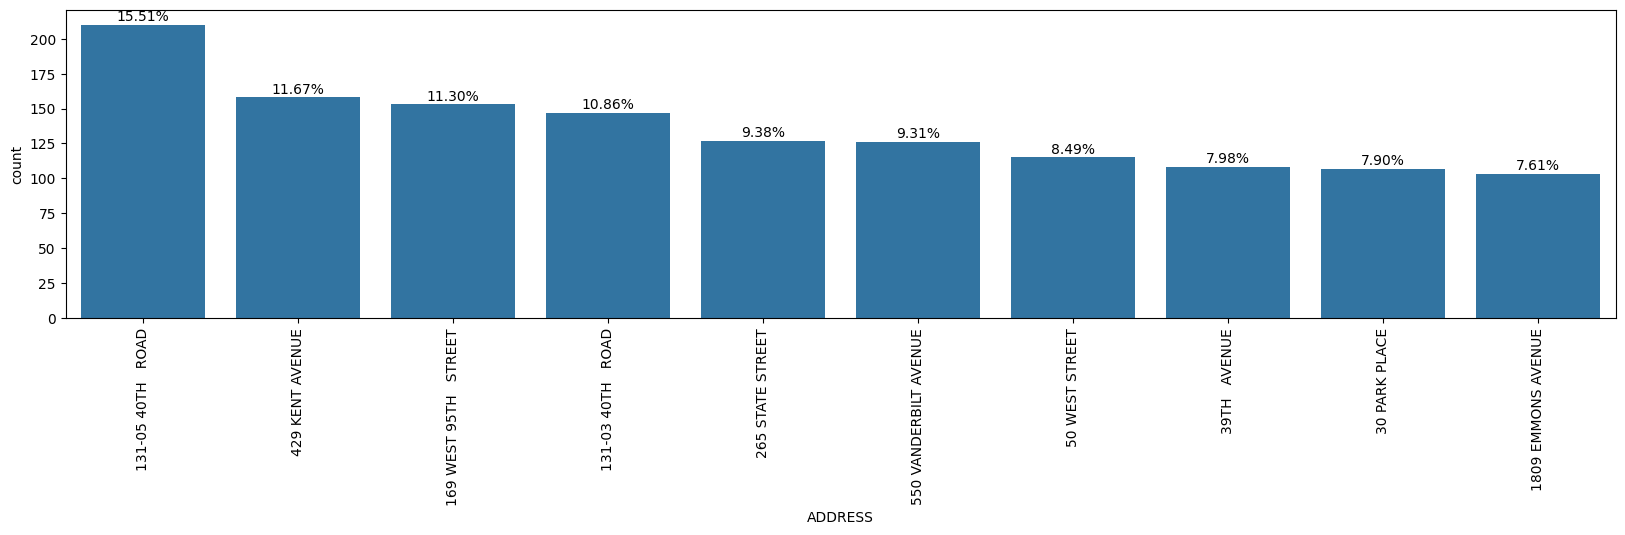

There are 72 unique address.


In [55]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['ADDRESS'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['ADDRESS'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="ADDRESS", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['ADDRESS'].value_counts().unique()), 'unique address.')




Among the data entries, the address '131-05 40th' has the highest rate, with '429 Kent Avenue' closely following behind.

## 4.1.7 Apartment Number

In [56]:
df['APARTMENT NUMBER'].value_counts().unique

<bound method Series.unique of APARTMENT NUMBER
        64934
4         295
3A        295
3B        274
2         273
        ...  
ST37        1
ST42        1
ST50        1
ST54        1
363         1
Name: count, Length: 3989, dtype: int64>

There is empty space in the data that need to be populated with zeros.

In [57]:
df['APARTMENT NUMBER'].replace(' ', pd.NA, inplace=True)

In [58]:
df['APARTMENT NUMBER'].fillna(0, inplace=True)

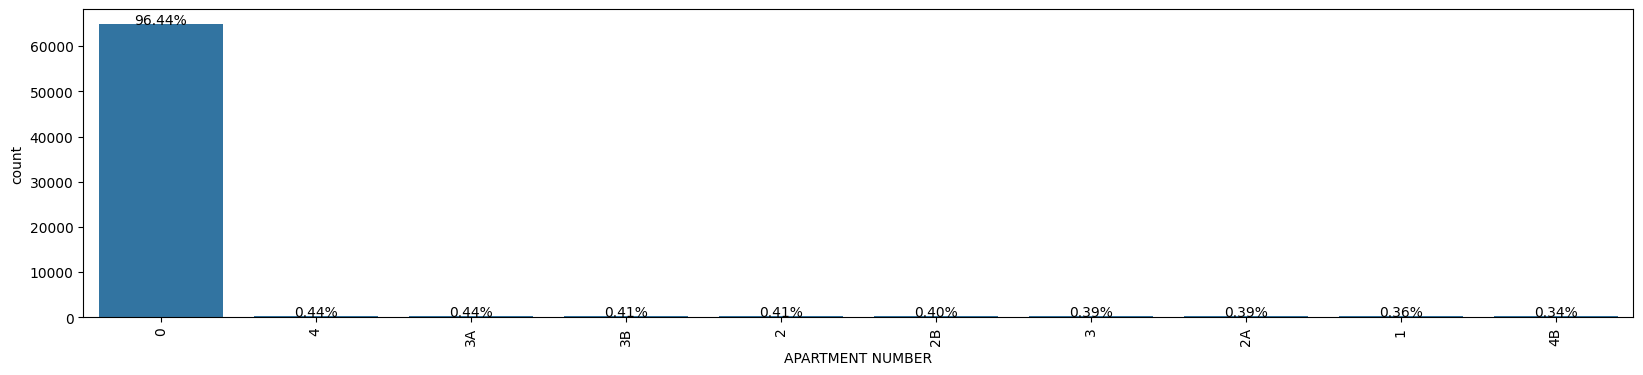

There are 95 unique apartment number.


In [59]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['APARTMENT NUMBER'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['APARTMENT NUMBER'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="APARTMENT NUMBER", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['APARTMENT NUMBER'].value_counts().unique()), 'unique apartment number.')



It is evident that there is a significant number of vacant apartment entries in the data, and the available information is insufficient.

## 4.1.8 LAND SQUARE FEET

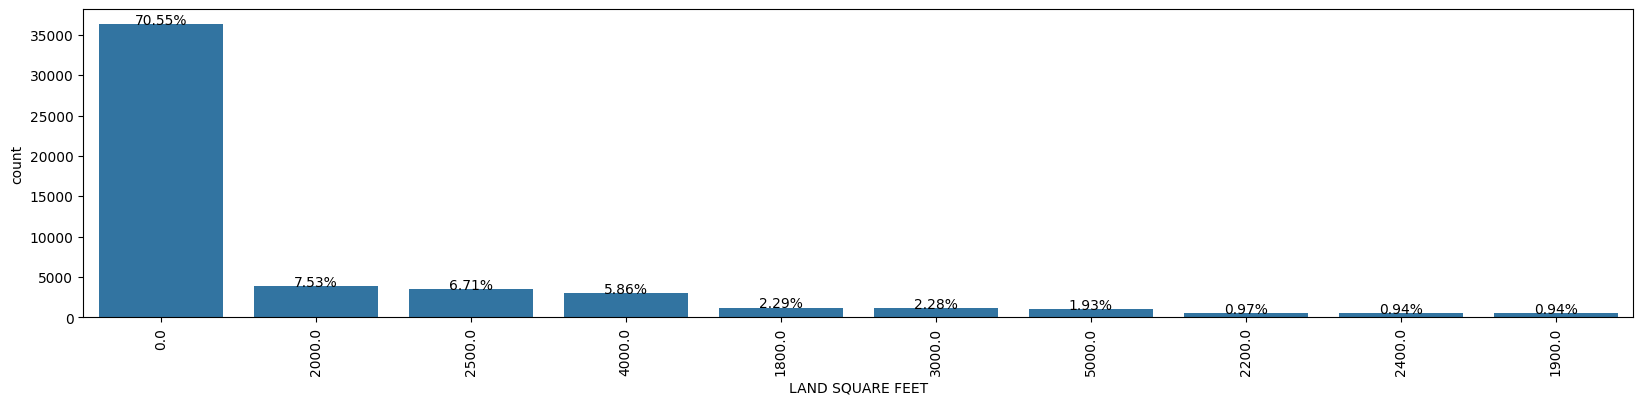

There are 115 unique land squre feet.


In [60]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['LAND SQUARE FEET'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['LAND SQUARE FEET'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="LAND SQUARE FEET", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['LAND SQUARE FEET'].value_counts().unique()), 'unique land squre feet.')



We see in the bar chart above that there is 51.04% unknown land square. After that, the maximum square feet is 0 and 2000.

## 4.1.9 GROSS SQUARE FEET

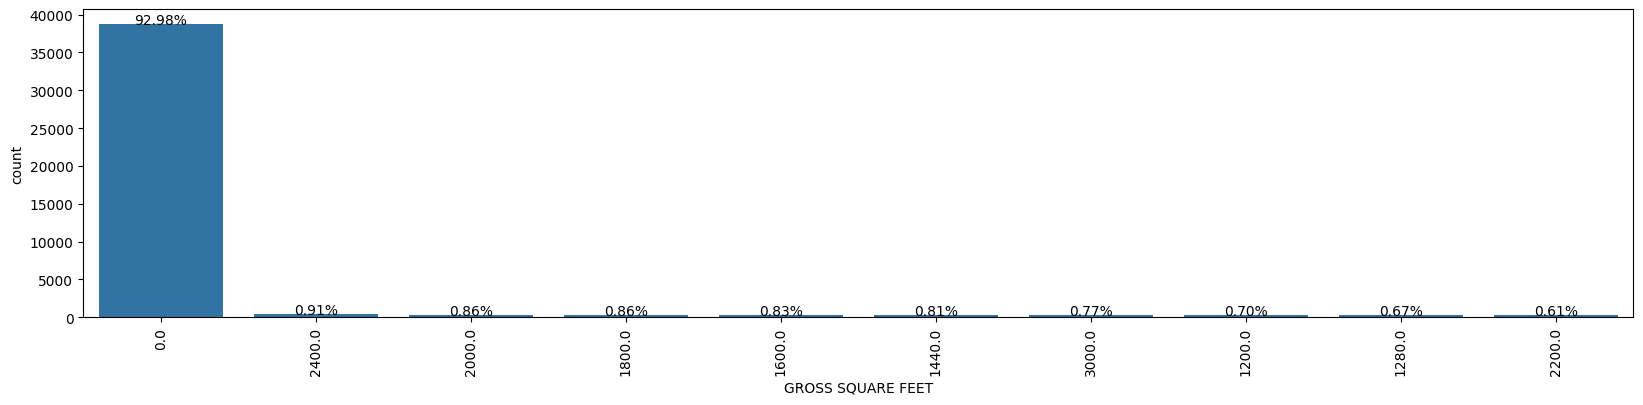

There are 140 unique gross squre feet.


In [61]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['GROSS SQUARE FEET'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['GROSS SQUARE FEET'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="GROSS SQUARE FEET", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['GROSS SQUARE FEET'].value_counts().unique()), 'unique gross squre feet.')



The dataset contains unspecified gross square footage, similar to the land square feet, and it has the highest rate.

## 4.1.10 BUILDING CLASS AT TIME OF SALE

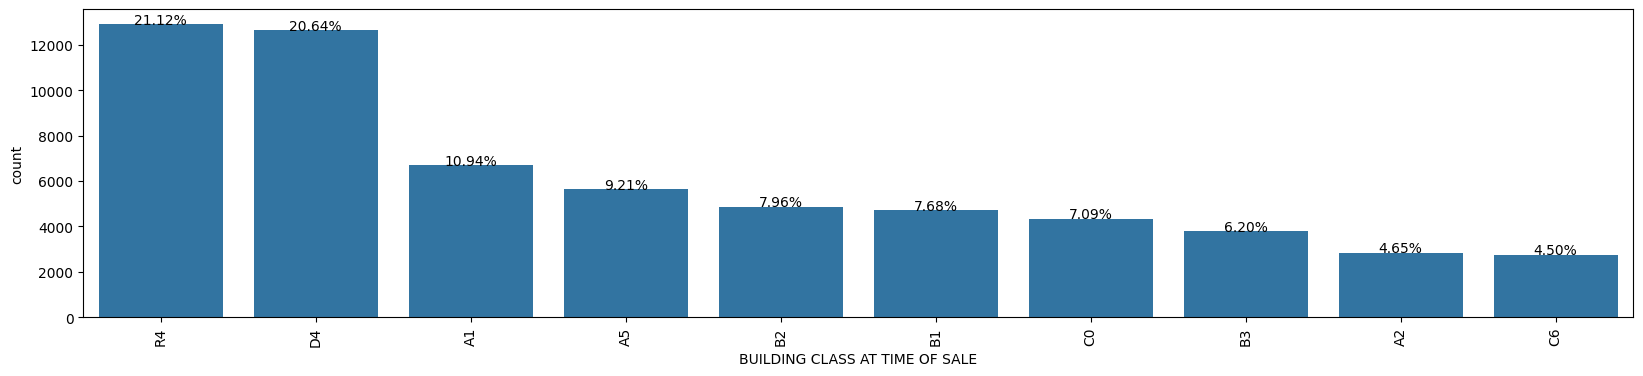

There are 89 unique building class at time of sale.


In [62]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = df['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = df[df['BUILDING CLASS AT TIME OF SALE'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="BUILDING CLASS AT TIME OF SALE", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(df['BUILDING CLASS AT TIME OF SALE'].value_counts().unique()), 'unique building class at time of sale.')



Building classes R4 and D4 exhibit the highest rates compared to other classes, with rates of 21.12 and 20.64, respectively.

## 4.1.11 Which season has the highest rate?

In [63]:
season_counts = df[['is_spring', 'is_autumn', 'is_winter', 'is_summer']].sum()

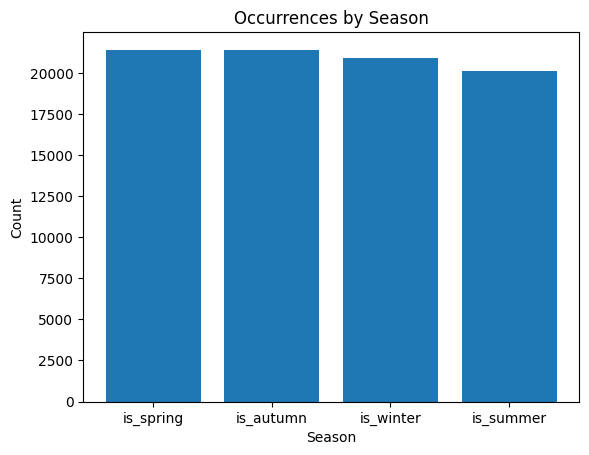

In [64]:
plt.bar(season_counts.index, season_counts.values)
plt.title('Occurrences by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Spring and autumn seasons prominently stand out in the dataset.

## 4.1.12 Is sale price higher on weekends or weekdays?

In [67]:
day_counts = df[['is_weekday', 'is_weekend']].sum()

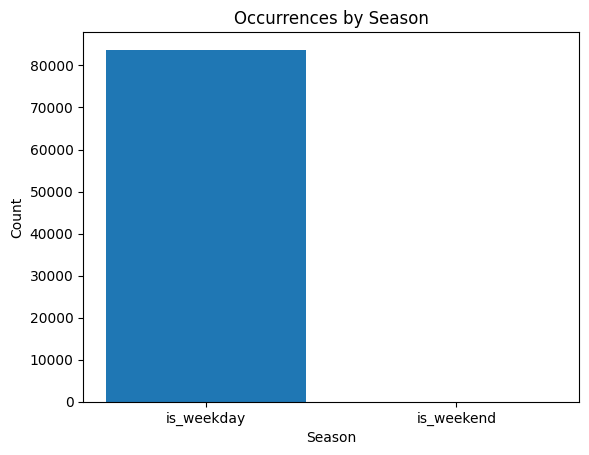

In [66]:
plt.bar(day_counts.index, day_counts.values)
plt.title('Occurrences by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

It's evident that all the data falls within the span of a weekday.

## 4.2 Numerical Variable 🔢

### 4.2.1 SALES PRICE

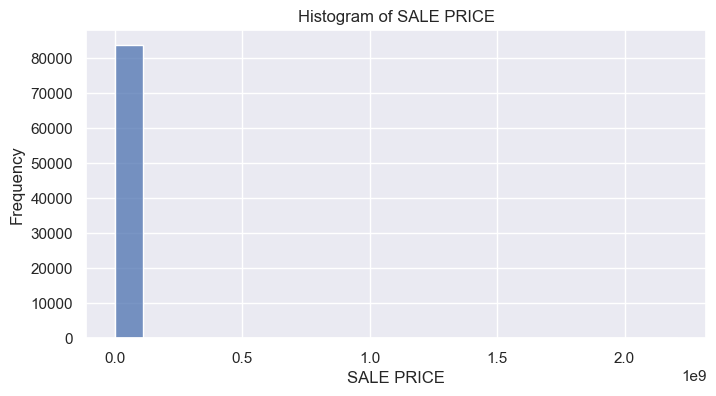

In [790]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['SALE PRICE'].dropna(), bins=20)  # You can adjust the number of bins
plt.title('Histogram of SALE PRICE')
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show()

Upon examining the histogram, it's challenging to discern any observations in the sales prices. To gain a clearer perspective, we should filter the prices for better visibility. we exclude observations that are beyond the specified caps

In [791]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

<Axes: xlabel='SALE PRICE', ylabel='Count'>

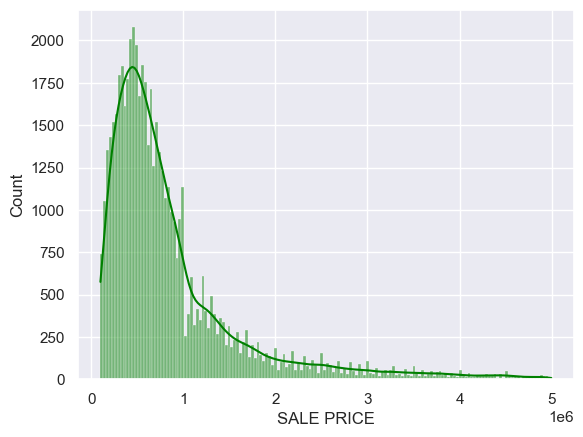

In [792]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="SALE PRICE", kde=True,color='green')

In [793]:
df['SALE PRICE'].skew()

2.344062871488611

Skewness is a statistical measure that quantifies the asymmetry of the probability distribution of a real-valued random variable. In this concept :

* If df['SALE PRICE'].skew() is approximately 0, it suggests that the distribution of 'SALE PRICE' is symmetric.

* If the skewness is greater than 0, it indicates a right-skewed (positively skewed) distribution, meaning that the tail on the right side is longer or fatter than the left side.

* If the skewness is less than 0, it indicates a left-skewed (negatively skewed) distribution, meaning that the tail on the left side is longer or fatter than the right side

In our graphic, SALE PRICE is right-skewed.

We need to apply a transformation to make the distribution more symmetric. Common transformations for right-skewed data include logarithmic transformation or square root transformation. These transformations help reduce the impact of extreme values and make the distribution more normal.

In [794]:
sales_price = np.log1p(df['SALE PRICE'])

0.19899828706471542


<Axes: xlabel='SALE PRICE', ylabel='Count'>

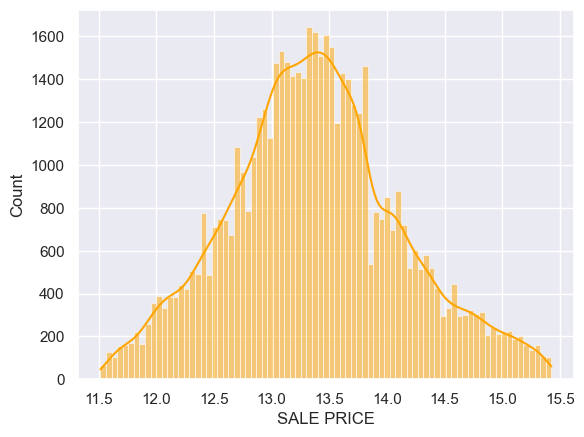

In [795]:
print(sales_price.skew())
sns.histplot(data=sales_price, kde=True,color='orange')

A skewness value close to zero (around 0.199 in this case) suggests that the transformed 'SALE PRICE' data is more symmetric, making it easier to work with in statistical analyses that assume normality.

### 4.2.2 GROSS SQUARE FEET

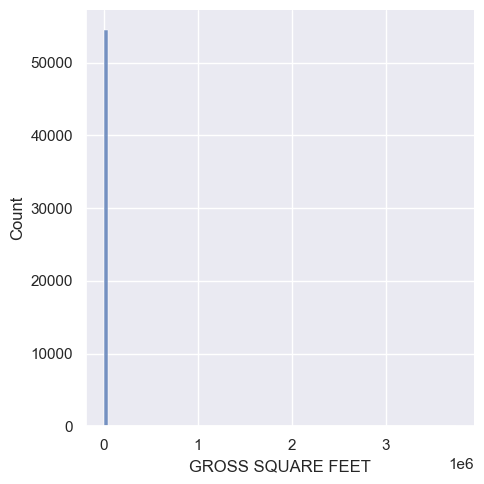

In [796]:
sns.displot(df['GROSS SQUARE FEET'], bins=80)

Observations in this histogram are not clearly visible, prompting the need for filtering.

In [797]:
df = df[df['GROSS SQUARE FEET'] < 10000]

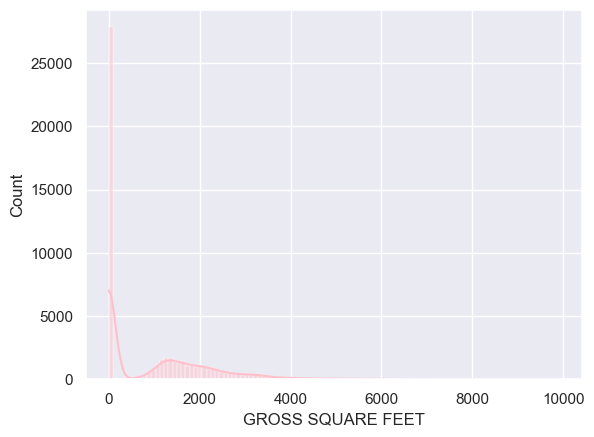

In [798]:
sns.histplot(data=df, x="GROSS SQUARE FEET", kde=True, color='pink');

In [799]:
df['GROSS SQUARE FEET'].skew()

1.6677345703480329

The distribution of gross square feet is also skewed to the right

### 4.2.3 LAND SQUARE FEET

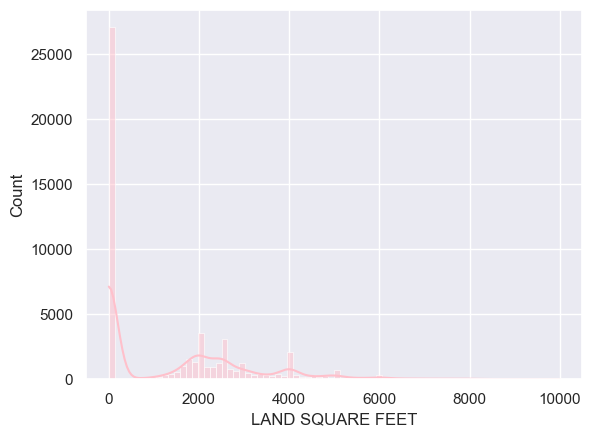

In [800]:
df = df[df['LAND SQUARE FEET'] < 10000]
sns.histplot(data=df, x="LAND SQUARE FEET", kde=True, color='pink');

In [801]:
df['LAND SQUARE FEET'].skew()

1.186985524512831

The distribution of land square feet is also skewed to the right

### 4.2.4 GROSS SQUARE FEET vs SALES PRICE

<Axes: xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

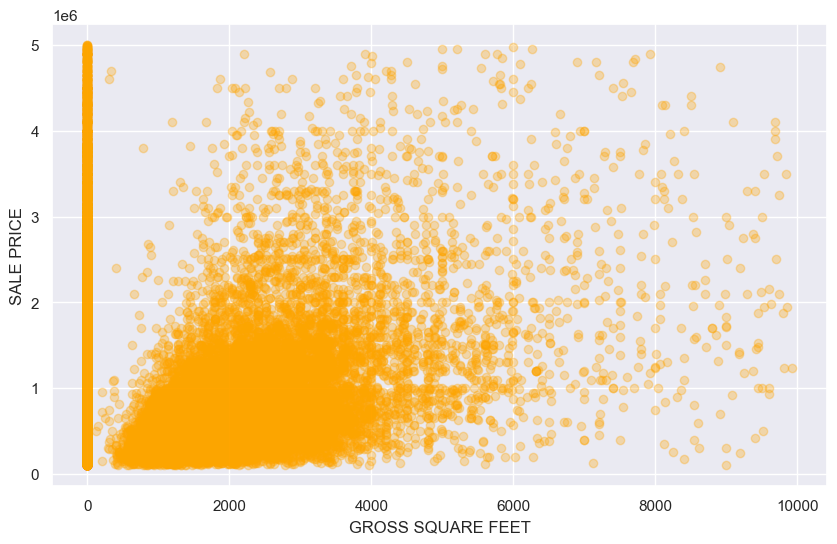

In [802]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3},color='orange')

The concentration of gross square footage falls within the range of 2000 to 4000. There is a positive correlation between this concentration and the sales price.

### 4.2.4 LAND SQUARE FEET vs SALES PRICE

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

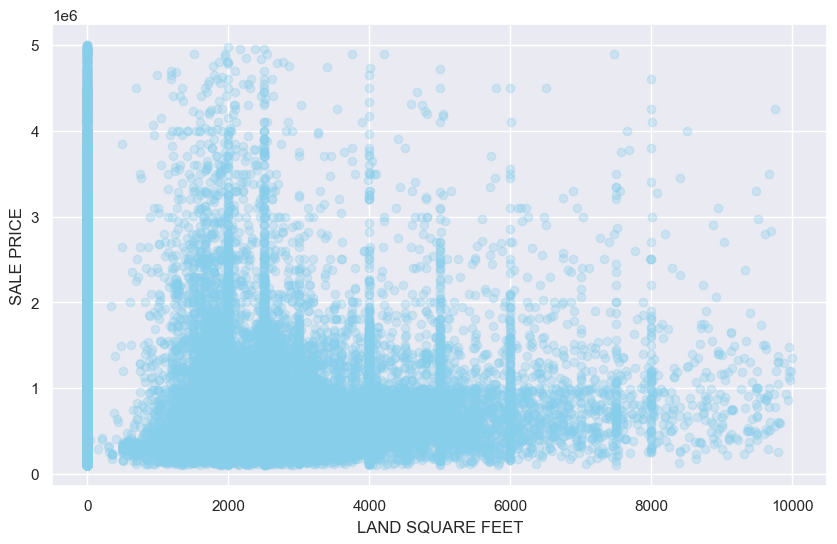

In [803]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3},color='skyblue')


There exists a mild positive correlation between the sale price and the land square footage. The density of the land square footage is within the range of 2000 and the sale price has changeable range

In [804]:
numerical_features

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'day', 'month', 'year', 'dayofyear', 'weekday'],
      dtype='object')

### 4.2.5 Residential Units vs Sale Price

Text(0.5, 1.0, 'Residential Units vs Sale Price')

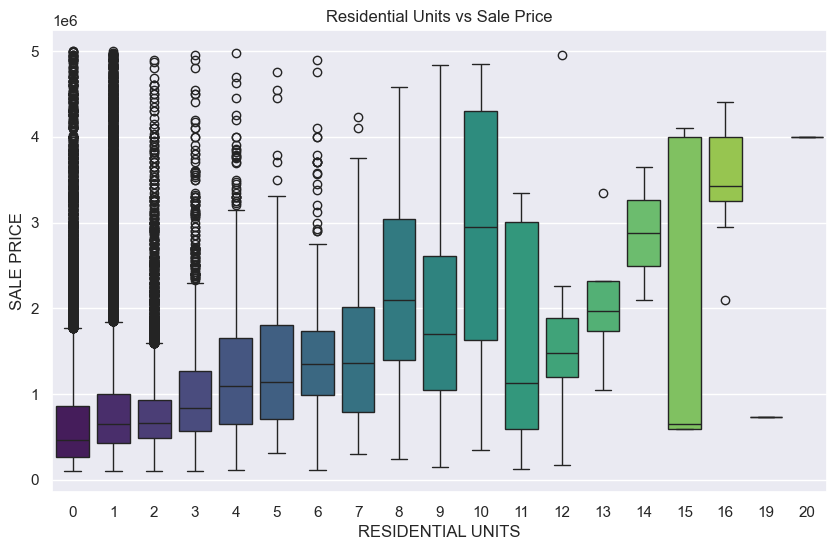

In [805]:
#plot residential units
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df, palette='viridis') 
plt.title('Residential Units vs Sale Price')

 The median sale price tends to rise with an increase in the number of residential units.


### 4.2.6 Commercial Units vs Sale Price

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

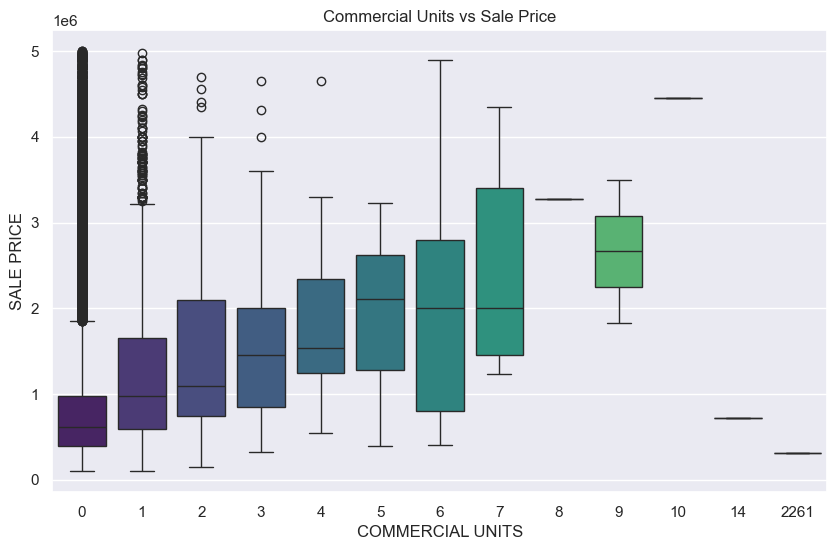

In [806]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=df,palette='viridis')
plt.title('Commercial Units vs Sale Price')

Likewise, the sale prices for commercial units typically show an upward trend as the number of units increases.

### 4.2.7 Total Units vs Sale Price

When we look at the total units deeply: 

In [807]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,24582
0,0,15493
2,2,9480
3,3,2721
4,4,695
6,6,360
5,5,170
8,8,133
7,7,70
9,9,56


Among the data, there are 15493 occurrences of '0' values, and a singular outlier with 2261 units. It is imperative to exclude these entries from the dataset.

In [808]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

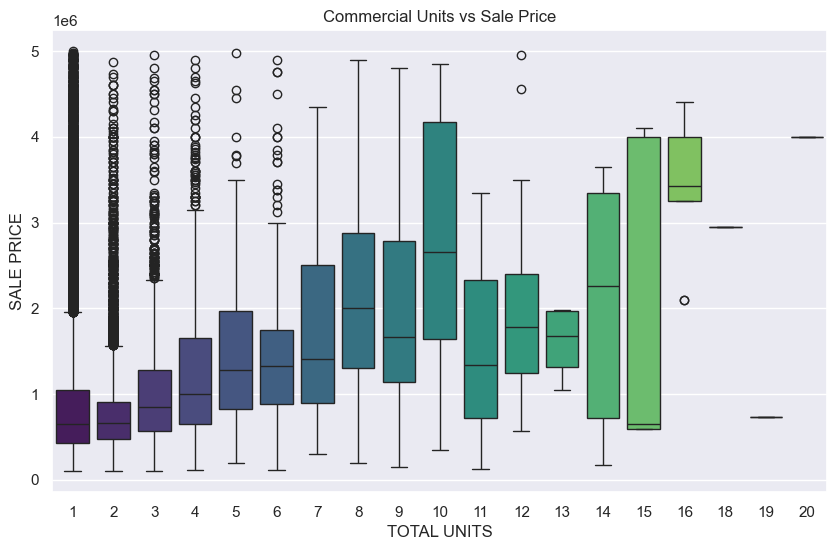

In [809]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y="SALE PRICE", data=df,palette='viridis')
plt.title('Commercial Units vs Sale Price')

### 4.2.8 Which day of the year has the highest sales prices?

<Axes: xlabel='day'>

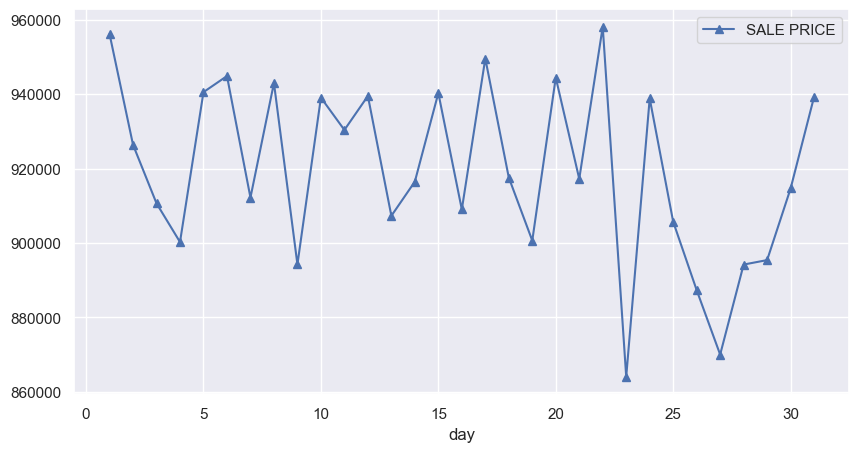

In [810]:
df.groupby('day')[['SALE PRICE']].mean().sort_index().plot(figsize = (10,5), marker = '^', color = 'b')


Sale price values exhibit peak levels on the 1st and 22nd days of the month, while reaching the lowest point on the 24th day.

### 4.2.9 Which month of the year has the highest sales prices?

<Axes: xlabel='month'>

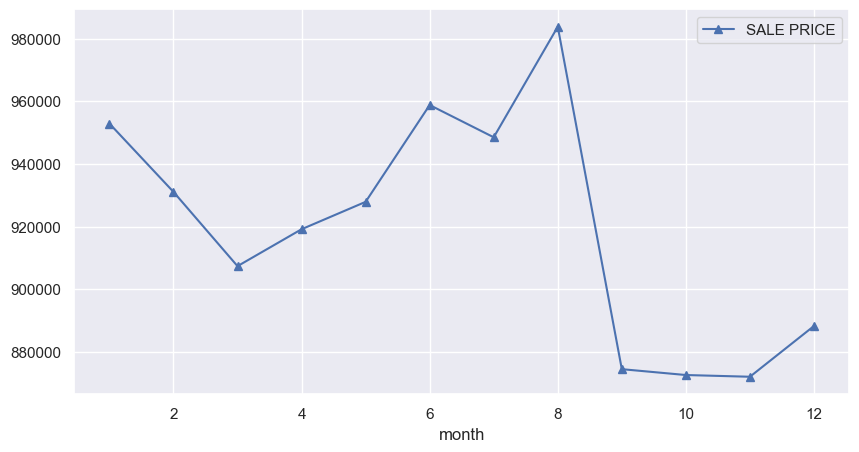

In [811]:
df.groupby('month')[['SALE PRICE']].mean().sort_index().plot(figsize = (10,5), marker = '^', color = 'b')

The peak sale price occurred during the months of 8, 9, 10, and 11, while the lowest value was observed in the 12th month.

### 4.2.10 Which year has the highest sales prices?

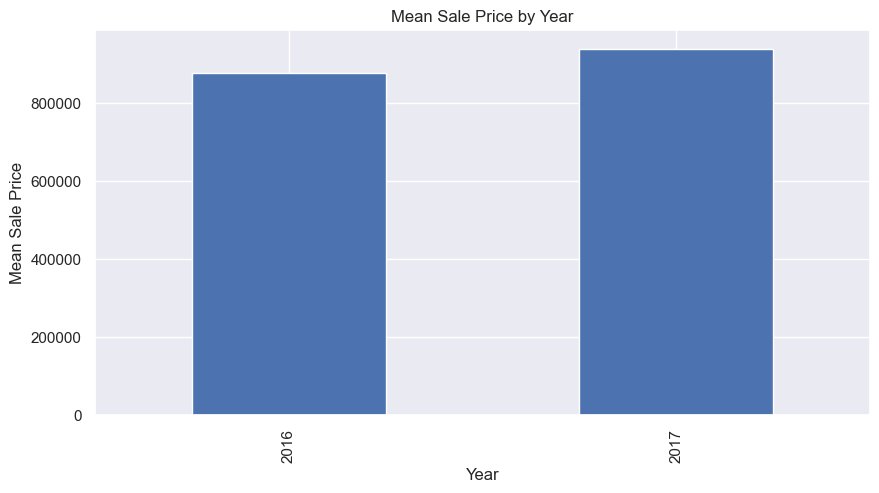

In [812]:
df.groupby('year')[['SALE PRICE']].mean().sort_index().plot(kind='bar', figsize=(10, 5), color='b', legend=False)
plt.title('Mean Sale Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Sale Price')
plt.show()


2017 stands out as the year with the highest number of sales.

 ## 4.3 Categorical 📊- Numerical 📈

### 4.3.1 Tax Class at Present vs Sale Price

In [813]:
pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT PRESENT,
1,"594,000.00"
1A,"390,000.00"
1B,"640,606.50"
1C,"958,668.00"
2,"980,000.00"
2A,"1,200,000.00"
2B,"1,847,500.00"
2C,"835,000.00"
4,"1,045,799.00"


<Axes: xlabel='TAX CLASS AT PRESENT'>

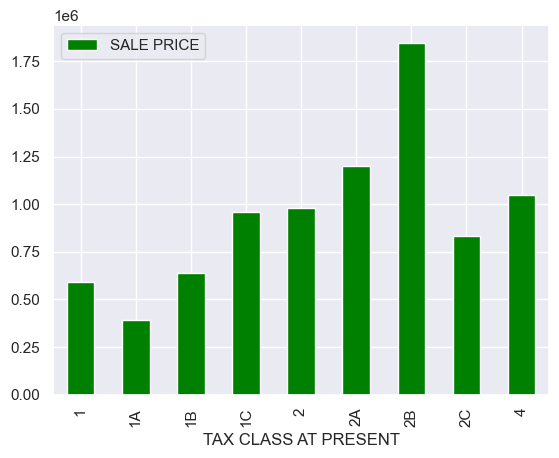

In [814]:
pivot.plot(kind='bar', color='green')

The highest sale price is associated with the 2B TAX CLASS.

### 4.3.2 Tax class at Time of Sale vs Sale Price

In [815]:
pivot=df.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,"582,437.50"
2,"990,000.00"
4,"1,041,598.00"


<Axes: xlabel='TAX CLASS AT TIME OF SALE'>

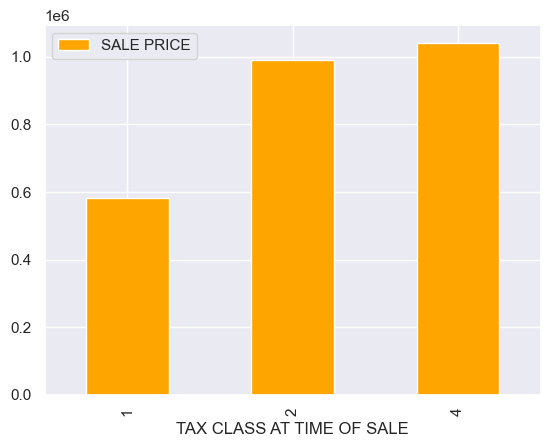

In [816]:
pivot.plot(kind='bar', color='orange')

The highest sales price is observed in Tax Class 4.

### 4.3.3 Borough vs Sale Price

In [817]:
pivot=df.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BOROUGH,
1,"1,435,000.00"
2,"452,400.00"
3,"860,000.00"
4,"635,000.00"
5,"470,000.00"


<Axes: xlabel='BOROUGH'>

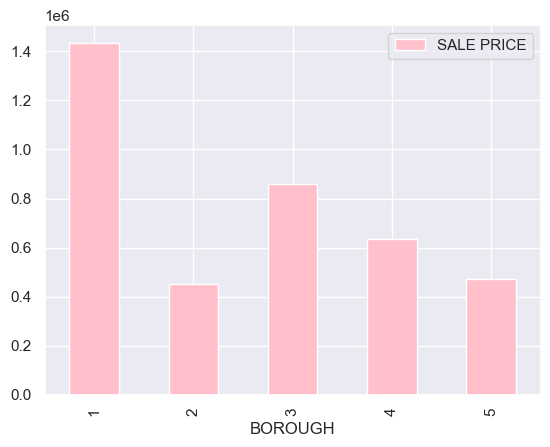

In [818]:
pivot.plot(kind='bar', color='pink')

1 and 3 boroughs have the highest sale price

### 4.3.4 Building Class Category vs Sales Price

In [819]:
pivot = df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot_sorted = pivot.sort_values(by='SALE PRICE', ascending=False)
pivot_sorted

,SALE PRICE
BUILDING CLASS CATEGORY,
08 RENTALS - ELEVATOR APARTMENTS,"3,670,000.00"
23 LOFT BUILDINGS,"2,837,500.00"
38 ASYLUMS AND HOMES,"2,674,416.00"
30 WAREHOUSES,"1,611,772.50"
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,"1,536,603.50"
43 CONDO OFFICE BUILDINGS,"1,460,598.50"
26 OTHER HOTELS,"1,400,000.00"
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,"1,398,000.00"
14 RENTALS - 4-10 UNIT,"1,350,000.00"


<Axes: xlabel='BUILDING CLASS CATEGORY'>

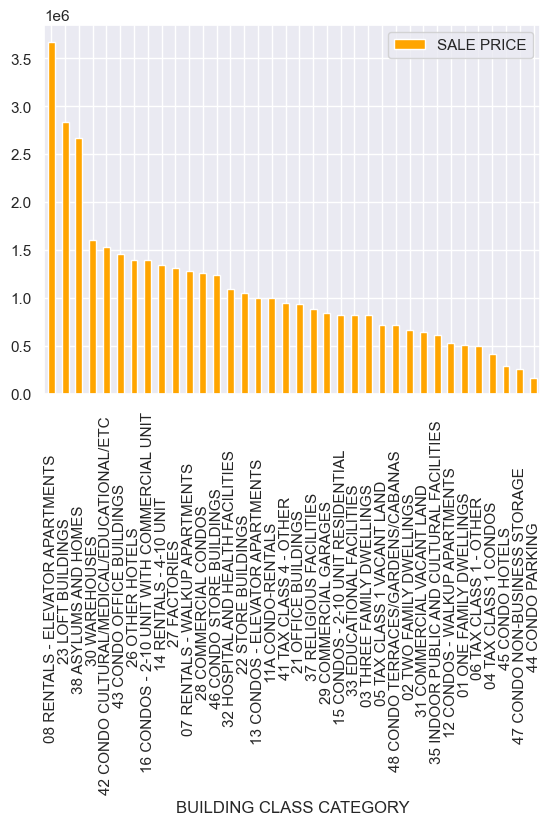

In [820]:
pivot_sorted.plot(kind='bar', color='orange')


Elevator apartments, loft building and asylums and home categories have the highest sale price.

In [821]:
categorical_features

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE', 'is_spring', 'is_summer', 'is_autumn',
       'is_winter', 'is_weekend', 'is_weekday'],
      dtype='object')

### 4.3.5 Neigbourhood vs Sale Price

In [822]:
#create new list called 'neighborhood' with top 20 most expensive average sale prices
from collections import Counter
neighborhood = list(dict(Counter(df.NEIGHBORHOOD).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(df['SALE PRICE'][df.NEIGHBORHOOD == i])
    avg_sale_prices.append(avg_price)

Text(0.5, 1.0, 'Average Sale Price in the Top 20 Neighborhoods')

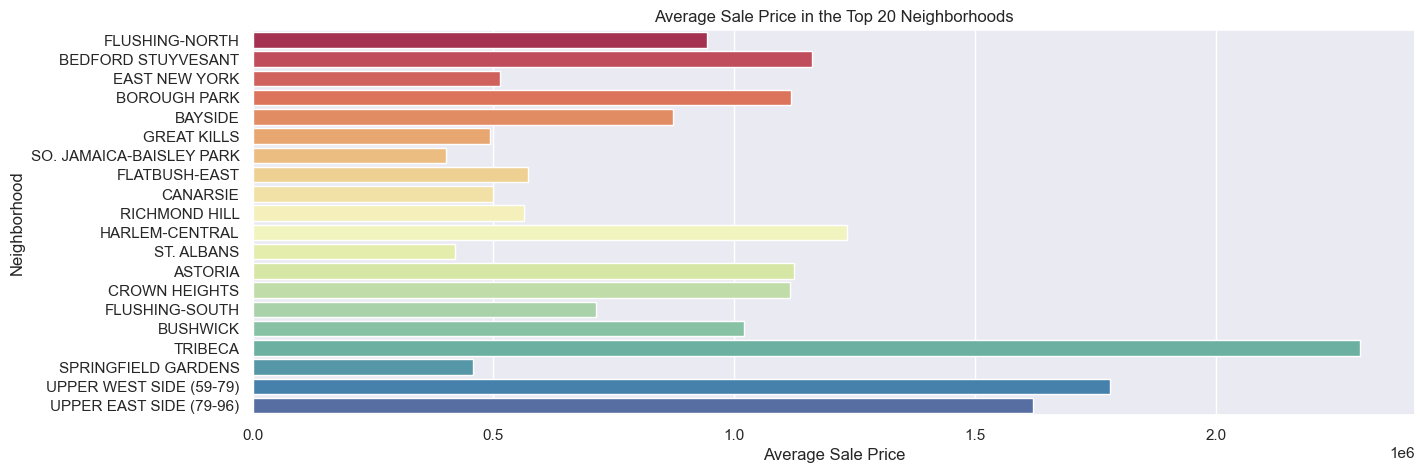

In [823]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")
ax.set_xlabel('Average Sale Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Sale Price in the Top 20 Neighborhoods')

The highest sale price is in Tribeca. The lowest sale price is in so. jamaica-baisley park.

### 4.3.6 Correlation Analysis

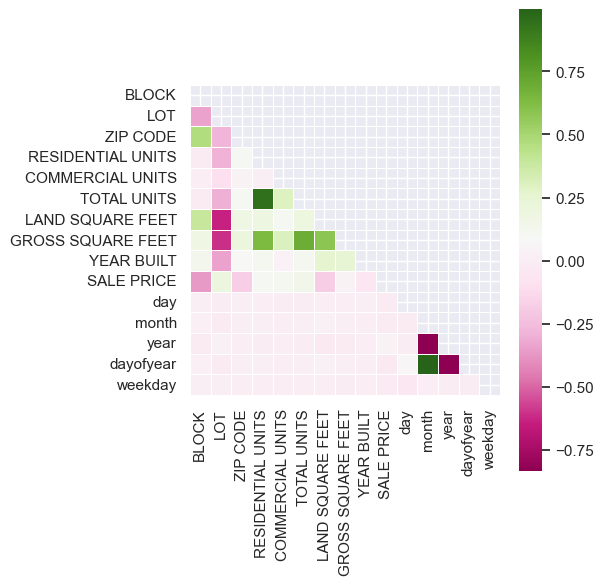

In [824]:

df1=df.select_dtypes(include=np.number)
corr_all = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (5, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .4, ax = ax, cmap = "PiYG")      
plt.show()

In the above figure, the heat map shows the relationship between two features. Each two features values must be between -1 and 1. When we explain the map:

* -1 means that there is a negative relationship between 2 features. For example, Lot have gross square feet a negative relationship. The colour of the value is dark pink.

* 0 means that there is no relationship between 2 features.

* 1 means that there is a positive relationship between 2 features. For example, Residential units and gross square feet have a strong positive relationship.

### 5. Preprocessing

In [825]:
drop_features=['day','month','year','dayofyear','weekday','is_spring','is_summer','is_autumn','is_winter','is_weekend','is_weekday','ADDRESS',
          'APARTMENT NUMBER','SALE DATE','BUILDING CLASS AT PRESENT','NEIGHBORHOOD','BUILDING CLASS AT TIME OF SALE']

In [826]:
df=df.drop(drop_features,axis=1)

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38362 entries, 3 to 84545
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    38362 non-null  category
 1   BUILDING CLASS CATEGORY    38362 non-null  object  
 2   TAX CLASS AT PRESENT       38362 non-null  category
 3   BLOCK                      38362 non-null  int64   
 4   LOT                        38362 non-null  int64   
 5   ZIP CODE                   38362 non-null  int64   
 6   RESIDENTIAL UNITS          38362 non-null  int64   
 7   COMMERCIAL UNITS           38362 non-null  int64   
 8   TOTAL UNITS                38362 non-null  int64   
 9   LAND SQUARE FEET           38362 non-null  float64 
 10  GROSS SQUARE FEET          38362 non-null  float64 
 11  YEAR BUILT                 38362 non-null  int64   
 12  TAX CLASS AT TIME OF SALE  38362 non-null  category
 13  SALE PRICE                 38362 non

### 5.1 Normalizing Numerical Features

In [829]:
numeric_columns=df.select_dtypes(include=np.number).columns

In [831]:
skewed = df[numeric_columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df[skewed] = np.log1p(df[skewed])

* Columns with skewness greater than 0.75 are selected. This threshold (0.75) is often used as a heuristic to identify highly skewed distributions.

* The resulting skewed Series now contains only the columns with skewness greater than 0.75.

* The log transformation (specifically, the np.log1p function) is applied to the selected skewed columns in the DataFrame data. This transformation is often used to reduce the impact of outliers and make the distribution more symmetric.

* np.log1p calculates the natural logarithm of one plus the input array element-wise.

In [832]:
scaler = StandardScaler()
scaler.fit(df[numeric_columns])
scaled_data = scaler.transform(df[numeric_columns])

for i, col in enumerate(numeric_columns):
       df[col] = scaled_data[:,i]

Standardized features facilitate faster convergence of optimization algorithms, improve model interpretability, enhance model robustness to outliers, and make models compatible with distance-based algorithms. 

### 5.2 Label Encoding for categorical features

Label Encoding is applied to categorical variables (features) in machine learning to convert them into numerical format.

In [833]:
def Encoding(df):
    
    label_encoder = LabelEncoder()
    cat=df.select_dtypes(include=['object','category']).columns
    for feature in cat:
            df[feature] = label_encoder.fit_transform(df[feature])
            
    return df     

In [834]:
df=Encoding(df)

### 6. Cross Validation

The data set will be split into 80% train and 20% test.

In [836]:
X = df.drop(['SALE PRICE'],axis=1)
y = df["SALE PRICE"]

In [837]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

### 7. Modelling

In modelling, we used six different regression models to comparing results. These models are linear, ridge,lasso, random forest, elastic net and gradient boosting algorithms.

### 7.1 Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the predicted and actual values, allowing for prediction and understanding of the linear relationship between variables.

In [870]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
Y_pred_lin = linreg.predict(X_test)
mse = mean_squared_error(y_test, Y_pred_lin)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.709606191932783
Root Mean Squared Error: 0.8423812628096514


 The MSE is 0.7096, indicating that, on average, the squared differences between the predicted and actual values are relatively low.

The RMSE value of 0.8424 suggests that, on average, the model's predictions deviate from the actual values by approximately 0.8424 units. Lower RMSE values indicate better model performance.

### 7.2 Ridge Regression

Ridge regression is a linear regression technique that adds a regularization term, proportional to the square of the L2 norm of the coefficients, to the standard least squares objective. This regularization helps prevent overfitting by penalizing large coefficients, providing a more robust and stable model when dealing with multicollinearity in the input features.

In [869]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
Y_pred_ridge = ridge.predict(X_test)
mse = mean_squared_error(y_test, Y_pred_ridge)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.7096061891287271
Root Mean Squared Error: 0.8423812611452887


### 7.3 Lasso Regression

Lasso regression is a linear regression method that incorporates L1 regularization, introducing a penalty term based on the absolute values of the coefficients. This encourages sparsity in the model by driving certain coefficients to exactly zero, effectively performing feature selection and promoting a simpler, more interpretable model.

In [868]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
mse = mean_squared_error(y_test, Y_pred_lasso)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.7097664298137093
Root Mean Squared Error: 0.8424763675105132


### 7.4 Random Forest Regression

Random Forest Regression is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks. It leverages the diversity of the trees to improve predictive accuracy and generalization, making it robust against overfitting and capable of capturing complex relationships in the data.

In [867]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)
Y_pred_rf = rf_regr.predict(X_test)

mse = mean_squared_error(y_test, Y_pred_rf)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.30949186773611026
Root Mean Squared Error: 0.556319932894832


### 7.5 Elastic Net Regression

Elastic Net Regression is a linear regression method that combines L1 (Lasso) and L2 (Ridge) regularization terms, providing a balance between feature selection and regularization of coefficients. It addresses the limitations of Lasso and Ridge regression by offering flexibility in handling multicollinearity and promoting sparsity in the model, making it suitable for high-dimensional datasets.

In [865]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

# Train the model
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.7117036796656088
Root Mean Squared Error: 0.8436253194787415


### 8. Result

The algorithm with the lowest Root Mean Squared Error (RMSE) generally indicates better performance in terms of predictive accuracy. 

* Random Forest has the lowest RMSE of 0.55, suggesting the best performance among the listed algorithms.

* Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression have similar RMSE values around 0.84, indicating comparable performance.

Therefore, based on RMSE alone, Random Forest appears to be the most effective algorithm for your specific regression task.

In this notebook:

* We applied a range of preprocessing techniques, including label encoding, feature engineering, data splitting, and normalization.

* We conducted a comprehensive analysis and exploration of the dataset, delving into each phase of the process.

* We leveraged five distinct regression methods to make predictions on test values, with the Random Forest algorithm showcasing the highest regression performance.

We appreciate the time you've dedicated. Thank you